In [3]:
%config InlineBackend.figure_formats = ['retina']
%matplotlib inline
import pandas as pd
import uproot
import awkward
import matplotlib.pyplot as plt
import numpy as np
import math
import numba
from matplotlib.colors import LogNorm
import uproot_methods
import glob
from tqdm.auto import tqdm

In [11]:
dfc = pd.concat(map(pd.read_csv,tqdm(glob.glob("/home/users/namin/2019/scouting/repo/beamspot/outputs/*.csv"))))


In [12]:
dfc

,x,y,z,run,lumi
0,0.095462,-0.065060,-0.594701,319658,5
1,0.095480,-0.065028,-0.409183,319657,155
2,0.095480,-0.065028,-0.409183,319657,161
3,0.095470,-0.065023,-0.649757,319639,586
4,0.095462,-0.065060,-0.594701,319658,10
...,...,...,...,...,...
42,0.095631,-0.063334,-0.251168,320008,70
43,0.095625,-0.063339,-0.469348,320008,27
44,0.095777,-0.063741,-0.263219,319993,579
45,0.095589,-0.063330,-0.488202,320006,65


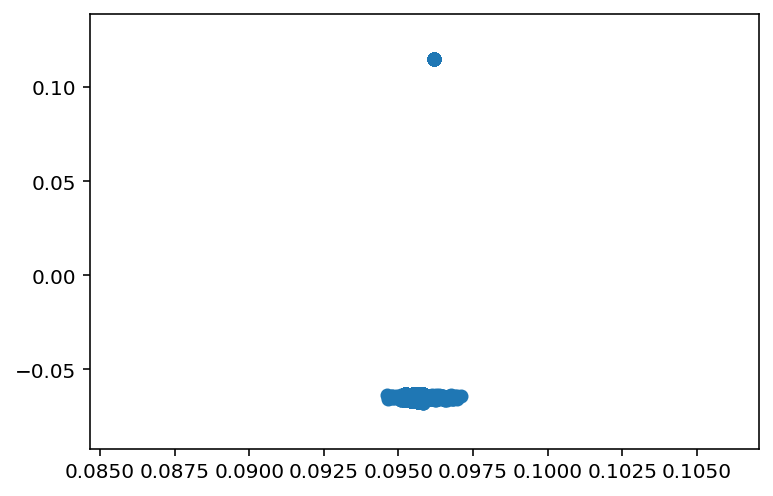

In [13]:
plt.scatter(dfc.x,dfc.y)

In [20]:
dfc[["x","y","z"]] = dfc[["x","y","z"]].astype("float32")
dfc[["run","lumi"]] = dfc[["run","lumi"]].astype("int32")

In [21]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27634 entries, 0 to 46
Data columns (total 5 columns):
x       27634 non-null float32
y       27634 non-null float32
z       27634 non-null float32
run     27634 non-null int32
lumi    27634 non-null int32
dtypes: float32(3), int32(2)
memory usage: 755.6 KB


In [24]:
dfc

,x,y,z,run,lumi
0,0.095462,-0.065060,-0.594701,319658,5
1,0.095480,-0.065028,-0.409183,319657,155
2,0.095480,-0.065028,-0.409183,319657,161
3,0.095470,-0.065023,-0.649757,319639,586
4,0.095462,-0.065060,-0.594701,319658,10
...,...,...,...,...,...
42,0.095631,-0.063334,-0.251168,320008,70
43,0.095625,-0.063339,-0.469348,320008,27
44,0.095777,-0.063741,-0.263219,319993,579
45,0.095589,-0.063330,-0.488202,320006,65


In [1]:

# t = uproot.open("/hadoop/cms/store/user/namin/ProjectMetis/ScoutingCaloMuon_Run2018C-v1_RAW_v3/output_1.root")["Events"]
t = uproot.open("/hadoop/cms/store/user/namin/ProjectMetis/ScoutingCaloMuon_Run2018C-v1_RAW_v3/output_2.root")["Events"]

NameError: name 'uproot' is not defined

In [2]:
%%time
run = t["run"].array()
lumi = t["luminosityBlock"].array()

NameError: name 't' is not defined

In [3]:
%%time
df = pd.DataFrame(dict(run=run,lumi=lumi))
df

NameError: name 'pd' is not defined

In [4]:
df = df.merge(dfbs,how="left",on=["run","lumi"])

NameError: name 'df' is not defined

In [6]:
dfbs["xyz"] = list(dfbs[["x","y","z"]].itertuples(index=False,name=None))
bstable = dfbs.set_index(["run","lumi"])["xyz"].to_dict()
bstable

NameError: name 'dfbs' is not defined